In [53]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline


### standard scaler:
* different featrues can be in different scale 
* we need to bring all features to same scale 


In [54]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [55]:
np.mean(df.x1)

-0.020655781247675305

In [56]:
np.std(df.x1)

1.9988477180247717

In [57]:
(df.x1 - np.mean(df.x1))/np.std(df.x1)

0      -0.955167
1      -0.164732
2      -0.859403
3      -1.652383
4       2.565913
5       0.973396
6       1.410219
7      -2.663163
8      -1.415001
9      -1.165182
10      1.703039
11     -0.733656
12     -1.271783
13     -1.919583
14     -0.628240
15      0.985444
16     -0.199561
17      0.346625
18      2.096193
19      1.297544
20      0.296691
21      0.005148
22      0.728995
23      0.927407
24     -0.173674
25      1.713278
26     -0.399222
27      0.082736
28      0.316812
29      0.435369
          ...   
9970   -1.751652
9971    1.279163
9972    0.615102
9973    0.173332
9974   -0.037685
9975   -0.053882
9976   -0.460641
9977    1.493855
9978    0.273108
9979   -1.633090
9980   -0.744191
9981   -1.941320
9982   -0.376772
9983   -0.056361
9984   -1.524355
9985    0.746393
9986    0.296317
9987    0.922475
9988    0.820470
9989    0.138933
9990    0.516441
9991   -1.499484
9992   -0.082191
9993   -0.479667
9994    1.338020
9995    1.138884
9996   -1.219090
9997   -0.0312

In [58]:
from sklearn.preprocessing import StandardScaler


In [59]:
ss = StandardScaler()

In [60]:
ss.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
ss.mean_

array([-0.02065578,  4.95697604, -4.96374552])

In [62]:
ss.var_

array([ 3.9953922 ,  9.15541186, 24.68237357])

In [63]:
np.sqrt(ss.var_)

array([1.99884772, 3.02579111, 4.96813582])

In [64]:
res = ss.transform(df)

imp

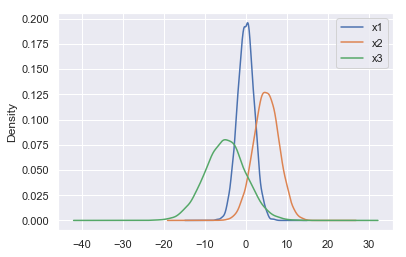

In [65]:
df.plot.kde() # kde plots the distribution

In [66]:
df_tf = pd.DataFrame(res)

In [67]:
df_tf.columns = ['X1','X2','X3']

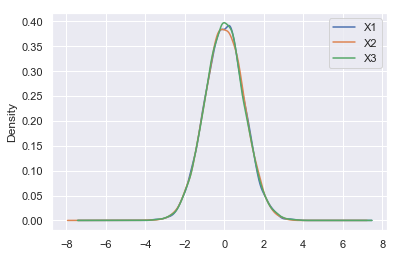

In [68]:
df_tf.plot.kde()

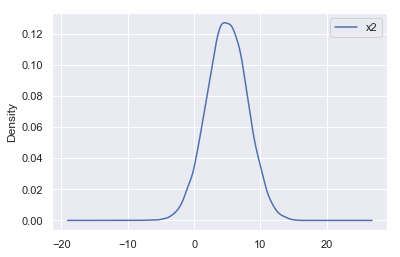

In [69]:
df[['x2']].plot.kde()

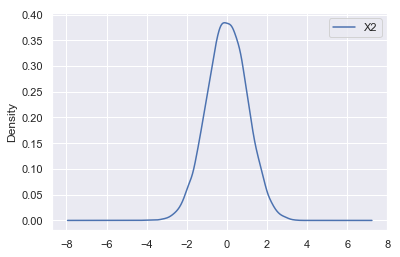

In [70]:
df_tf[['X2']].plot.kde()

* for many ML algoriths ,the value of data dont matter as much as the relationship between values
<hr>
* standard scaler is good fornormally distributed data

### min max scaler
* suited where data is not normally distributed

In [71]:
df=pd.DataFrame({
    # positive skew
    
    'x1':np.random.chisquare(8,1000),
    # negative skew 
    'x2':np.random.beta(8,2,1000)*40,
    # no skew
    'x3':np.random.normal(50,3,1000)
})

In [72]:
df

,x1,x2,x3
0,7.571189,35.010706,54.195075
1,4.198797,29.953497,53.643673
2,19.451732,24.781050,50.157911
3,8.040436,33.123435,48.880135
4,10.303633,31.814104,47.203598
5,6.650107,33.996029,50.903448
6,3.151418,31.082327,49.670771
7,11.246361,34.368400,55.834178
8,4.882948,30.836163,47.161230
9,9.433460,38.380180,53.201576


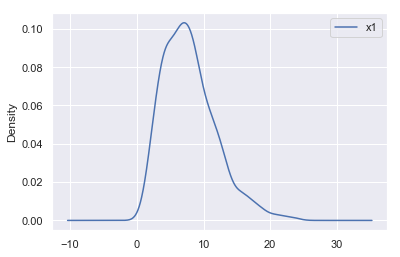

In [73]:
df[['x1']].plot.kde() # it is not normally distributed

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
mm = MinMaxScaler()

In [76]:
mm.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [77]:
mm.min_

array([-0.04566435, -0.3590657 , -2.1037742 ])

In [78]:
mm.data_range_

array([22.79163711, 29.3313731 , 19.11484732])

In [79]:
res = mm.transform(df)

In [80]:
df_tf = pd.DataFrame(res)

In [81]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt',index_col='Unnamed: 0')

In [82]:
house_data.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

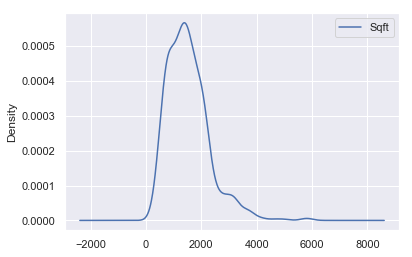

In [83]:
house_data[["Sqft"]].plot.kde()

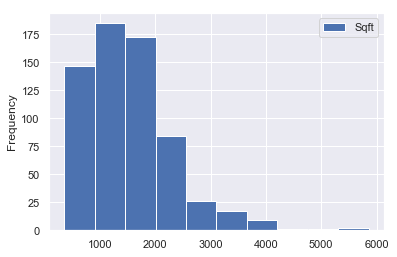

In [84]:
house_data[["Sqft"]].plot.hist()

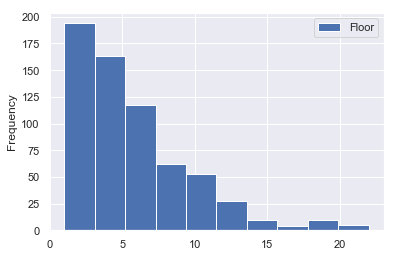

In [85]:
house_data[["Floor"]].plot.hist()

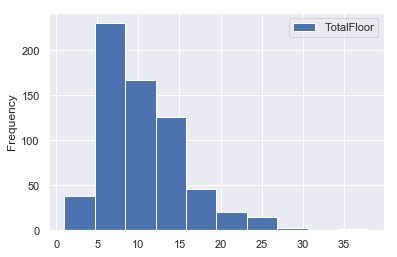

In [86]:
house_data[["TotalFloor"]].plot.hist()

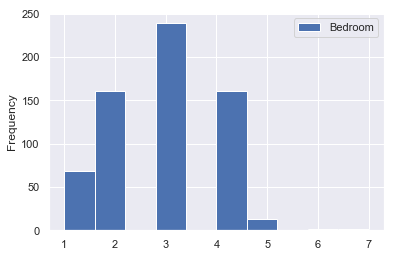

In [87]:
house_data[["Bedroom"]].plot.hist()

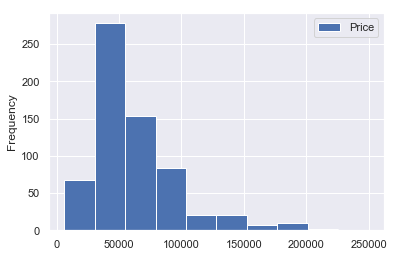

In [88]:
house_data[["Price"]].plot.hist()

Important Interview Question :How to check if data is normally distributed
* Graphical Methods Like Histogram or Kde or QQPlot (suggested read)
* Statical Test - Shapiro-Wilk Test, K^2 Test, AD Test (additional read)

###  robust scaler
* suuited for data with outliers
* earlier scaling methods are impacted by outliers
* robust scaler takes care of ouyliers


### 5 Normalizer

In [89]:
df=pd.DataFrame({
    'x1':np.random.randint(-100,100,1000).astype(float),
    'y1':np.random.randint(-80,80,1000).astype(float),
    'z1':np.random.randint(-150,150,1000).astype(float),
})

In [90]:
np.sqrt(np.sum(np.square(df),axis=1))

0      139.122248
1       93.978721
2       85.936023
3      103.696673
4       72.862885
5      137.640837
6      128.662349
7      126.293309
8      150.096636
9      133.869339
10     134.238594
11      75.272837
12      83.366660
13     155.067727
14     137.891262
15     111.991071
16     130.541181
17     118.579088
18      95.713113
19     137.673527
20     142.007042
21      67.260687
22     116.254032
23     116.047404
24     122.812866
25     116.640473
26      62.393910
27     131.780120
28      98.188594
29      89.587946
          ...    
970    102.347447
971     91.181138
972    147.135992
973     90.011110
974     47.937459
975     70.356236
976    146.263461
977     77.672389
978     75.696763
979     90.022219
980     62.785349
981    112.178429
982    113.635382
983     96.384646
984    161.378437
985     28.337255
986    129.437243
987    168.389430
988     95.885348
989     90.890043
990    112.805142
991    119.549153
992    130.602450
993     97.087589
994    116

In [91]:
df[:4]

,x1,y1,z1
0,-65.0,73.0,-99.0
1,-40.0,-64.0,56.0
2,43.0,-44.0,-60.0
3,63.0,40.0,-72.0


In [92]:
from sklearn.preprocessing import Normalizer

In [93]:
nn = Normalizer()

In [94]:
nn.fit(df)

Normalizer(copy=True, norm='l2')

In [95]:
res = nn.transform(df)

In [96]:
res[:5]

array([[-0.46721499,  0.52471837, -0.71160437],
       [-0.42562827, -0.68100522,  0.59587957],
       [ 0.50037224, -0.5120088 , -0.69819382],
       [ 0.60754119,  0.38574044, -0.69433279],
       [ 0.38428344,  0.68622043,  0.61759838]])

In [98]:
df_tf.columns=['x1','x2','x3']

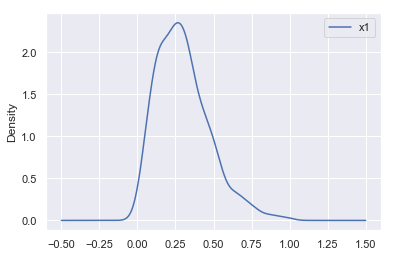

In [99]:
df_tf[['x1']].plot.kde()

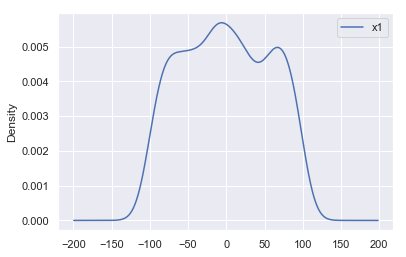

In [100]:
df[['x1']].plot.kde()

Interview Question

When to use scaling & when to use Normalization

Binerization Technique
* Binning data into buckets
<hr>

### Dealing with nominal and ordinal data 
* Label Encoder
* Label binerizer
* oneHotEncoder
* OrdinalEncoder

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
df=pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [103]:
le = LabelEncoder()

In [104]:
le.fit(df.Income)

LabelEncoder()

In [105]:
le.classes_

array(['High', 'Low', 'Medium'], dtype=object)

In [107]:
le.transform(df.Income)

array([1, 1, 0, 2, 2, 0])

* label encoder works on a column not on entire data frame

In [108]:
from sklearn.preprocessing import LabelBinarizer

In [109]:
lb = LabelBinarizer()

In [110]:
lb.fit(df.Income)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [111]:
lb.transform(df.Income)

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]], dtype=int32)

* label Binarizer also works on column

In [112]:
df=pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High'],
    'Location':['Delhi','Mumbai','Bangalore','Kolkata','Chennai','Mumbai']})

In [113]:
from sklearn.preprocessing import OneHotEncoder

In [114]:
ohe = OneHotEncoder()

In [116]:
ohe.fit(df[["Income","Location"]])

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [118]:
ohe.categories_

[array(['High', 'Low', 'Medium'], dtype=object),
 array(['Bangalore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object)]

In [120]:
ohe.transform(df[["Income","Location"]]).toarray()

array([[0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1.]])

OneHotEncoders convert data into one hot information and takes multiple columns as input

In [121]:
from sklearn.preprocessing import OrdinalEncoder

In [122]:
ode = OrdinalEncoder()

In [124]:
ode.fit(df[["Income","Location"]])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [125]:
ode.transform(df[["Income","Location"]])

array([[1., 2.],
       [1., 4.],
       [0., 0.],
       [2., 3.],
       [2., 1.],
       [0., 4.]])

Dealing with Nominal & Ordinal 
* DataLabelEncoder - Takes col, Returns encoded.
* LabelBinerizer - Takes col, Returns onehot
* OneHotEncoder - Takes mul cols, Returns onehot
* OrdinalEncoder - Takes mul cols, Returns encoded

### imp
* when to use OneHotEncoder - if there is no order in data column like Gender
           - OHE will increase the number of columns & thus data sizes
* when to LabelEncoder _ If there is order in the data use label encoding like low medium high 
* As we learn more about estimators, we will realize usage of these preprocessors

### END